In this EDA (Explaratory data analysis) I'll try to answer the following questions :
- What's the distribtion of age in both datasets
- What's the percentage of depressed people who listen to music per gendre
- See what platform people use more frequently and the most listened genre per platform
- Correlation between bpm and depression
- Percentage of depressed people who are explaratory
- Most depressed field
- Number of panic attack and depressed ppl and is there a correlation
- Number of ppl who seeked medical help
- Evolution of depression with age

In [118]:
import warnings
warnings.filterwarnings('ignore')

In [119]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
plt.style.use('ggplot')

In [121]:
#Read data
df1 = pd.read_csv("Students_mental_health_cleaned.csv")
#df2 = pd.read_csv("Music_effects.csv")
df2 = pd.read_csv("Music_effects_youth.csv")

In [122]:
df1.head()

,Gender,Age,Course,Year of study,CGPA,Marital status,Depression,Anxiety,Panic attack,Specialist treatment
0,Female,18.0,Engineering,1,3.24,No,Yes,No,Yes,No
1,Male,21.0,Religion,2,3.24,No,No,Yes,No,No
2,Male,19.0,Information Technology,1,3.24,No,Yes,Yes,Yes,No
3,Female,22.0,Other,3,3.24,Yes,Yes,No,No,No
4,Male,23.0,Other,4,3.24,No,No,No,No,No


In [123]:
df2.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,No effect
1,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
2,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
3,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
4,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve


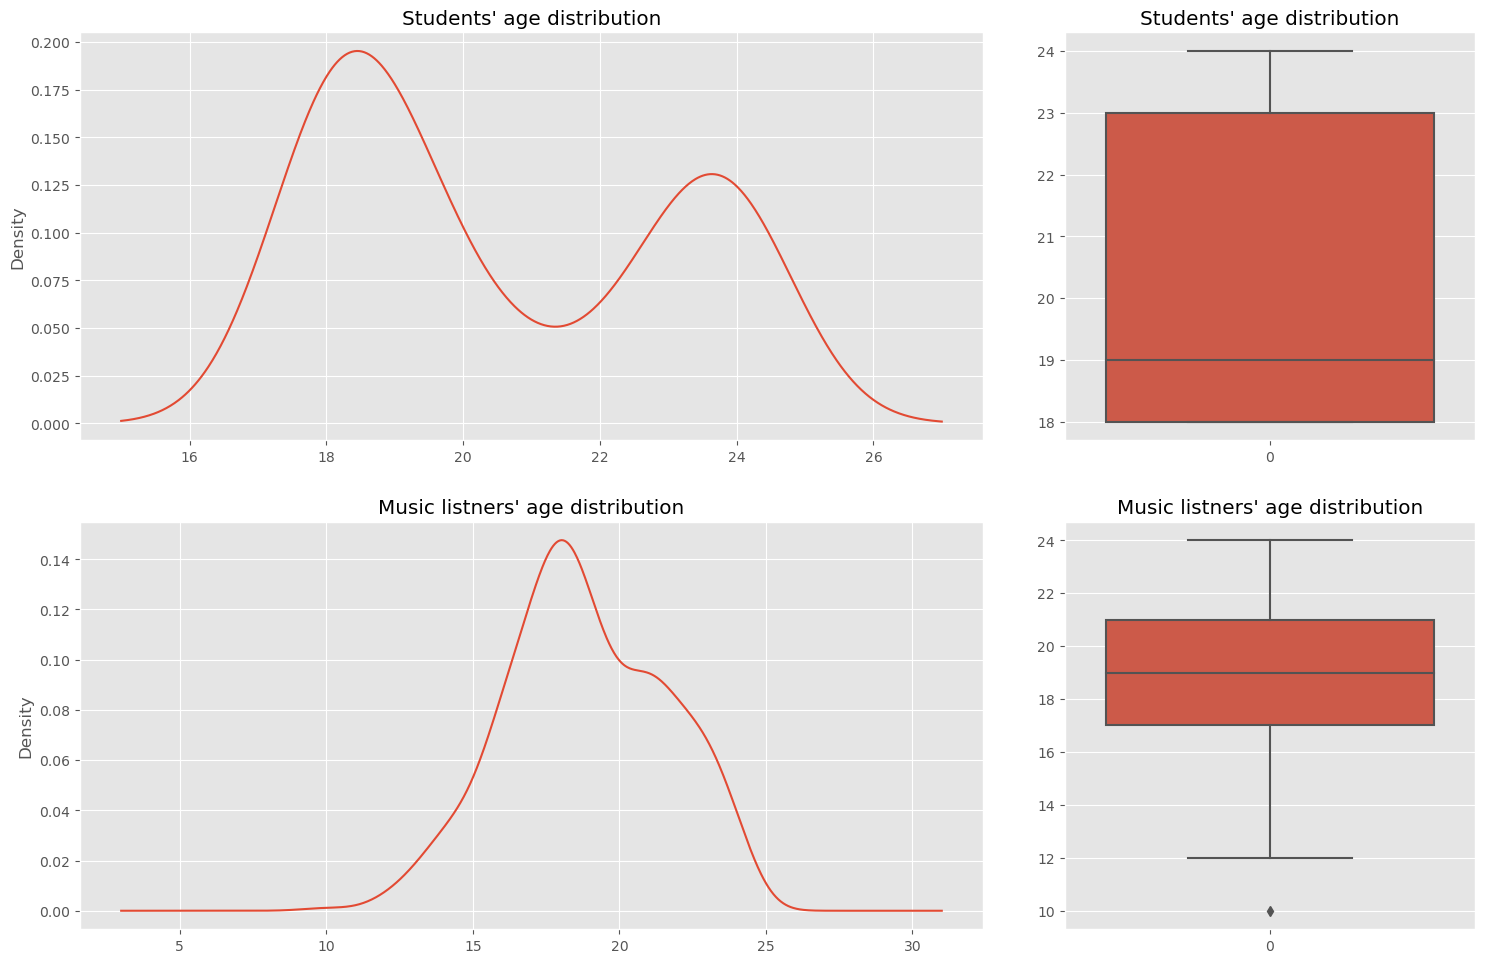

In [124]:
#What's the distribtion of age in both datasets
fig, axs = plt.subplots(figsize = (18,18))
ax0 = plt.subplot2grid(shape = (3,3), loc = (0,0), colspan=2)
ax1 = plt.subplot2grid(shape = (3,3), loc = (1,0), colspan=2)
ax2 = plt.subplot2grid(shape = (3,3), loc = (0,2))
ax3 = plt.subplot2grid(shape = (3,3), loc = (1,2))
axes = [ax0, ax1, ax2, ax3]
df1['Age'].plot(kind = 'kde', ax = axes[0])
axes[0].set_title("Students' age distribution")
df2['Age'].plot(kind = 'kde', ax= axes[1])
axes[1].set_title("Music listners' age distribution")
sns.boxplot(df1['Age'], ax = axes[2])
axes[2].set_title("Students' age distribution")
sns.boxplot(df2['Age'], ax = axes[3])
axes[3].set_title("Music listners' age distribution")
plt.show()

In [125]:
#Percentage of depressed people that listen to music
percentage = round(df2[df2['Depression'] > 6].shape[0] * 100 / df2.shape[0],2)
print("The percentage of people who listen to music and who are depressed is: ",percentage,"%\n")

The percentage of people who listen to music and who are depressed is:  34.84 %



In [126]:
#Percentage of people who think music can help in reducing depression
percentage_mus_eff = round(df2[df2['Music effects'] == "Improve"].shape[0] * 100 / df2.shape[0],2)
print("The percentage of people who think that music helps in reducing depression is:", percentage_mus_eff,'%\n')

The percentage of people who think that music helps in reducing depression is: 76.64 %



Almost 77% of the people that listen to music in our dataset think that music has a positive effect on depression

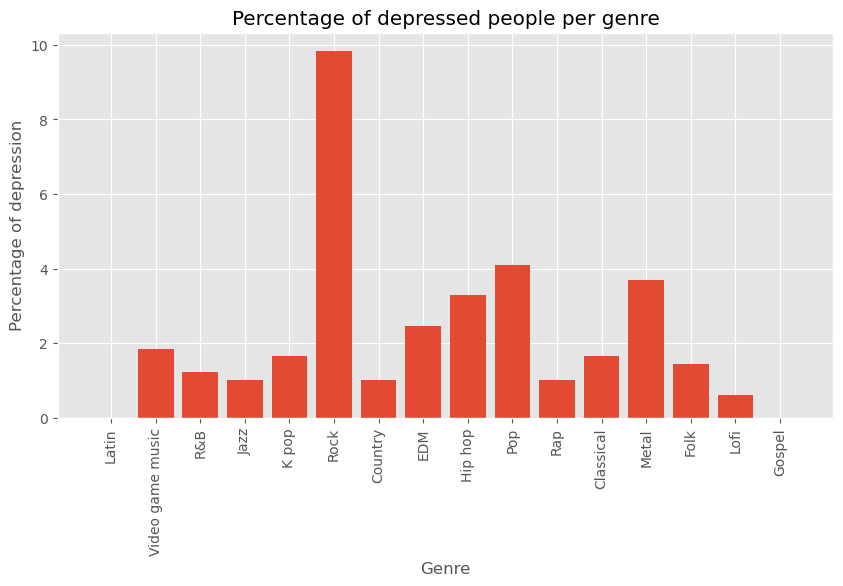

In [127]:
#Percentage of depressed people per genre
genre_dep = {}
for genre in df2['Fav genre']:
    genre_dep[genre] = round(df2[(df2['Fav genre'] == genre) & (df2['Depression'] > 6)].shape[0] * 100 / df2.shape[0], 2)
plt.figure(figsize = (10,5))
plt.bar(genre_dep.keys(), genre_dep.values())
plt.title("Percentage of depressed people per genre")
plt.xlabel('Genre')
plt.ylabel('Percentage of depression')
plt.xticks(rotation = 90)
plt.show()

We can notice that people who listen to rock are most depressed while those who listen to latin, Rap and Gospel are the least depressed listeners

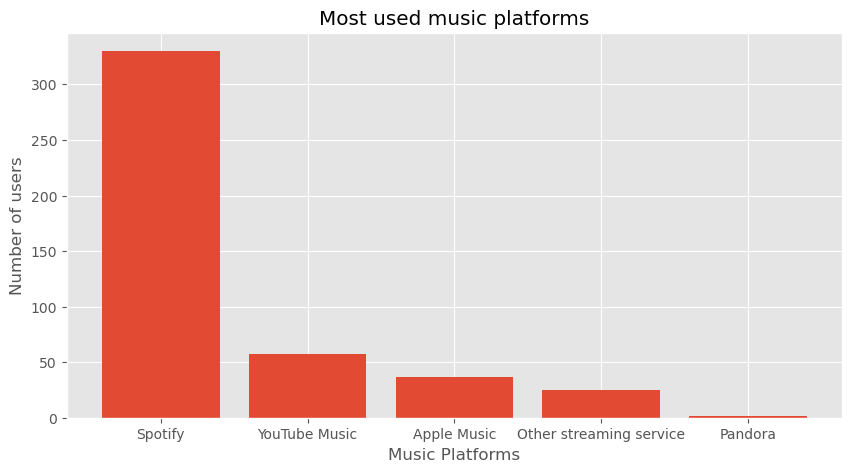

In [128]:
#What platform people use more frequently
plt.figure(figsize= (10,5))
plt.bar(df2['Primary streaming service'].value_counts().index , df2['Primary streaming service'].value_counts().values)
plt.title('Most used music platforms')
plt.xlabel('Music Platforms')
plt.ylabel('Number of users')
plt.show()

We see that the most used platform is Spotify and the least used one is Pandora

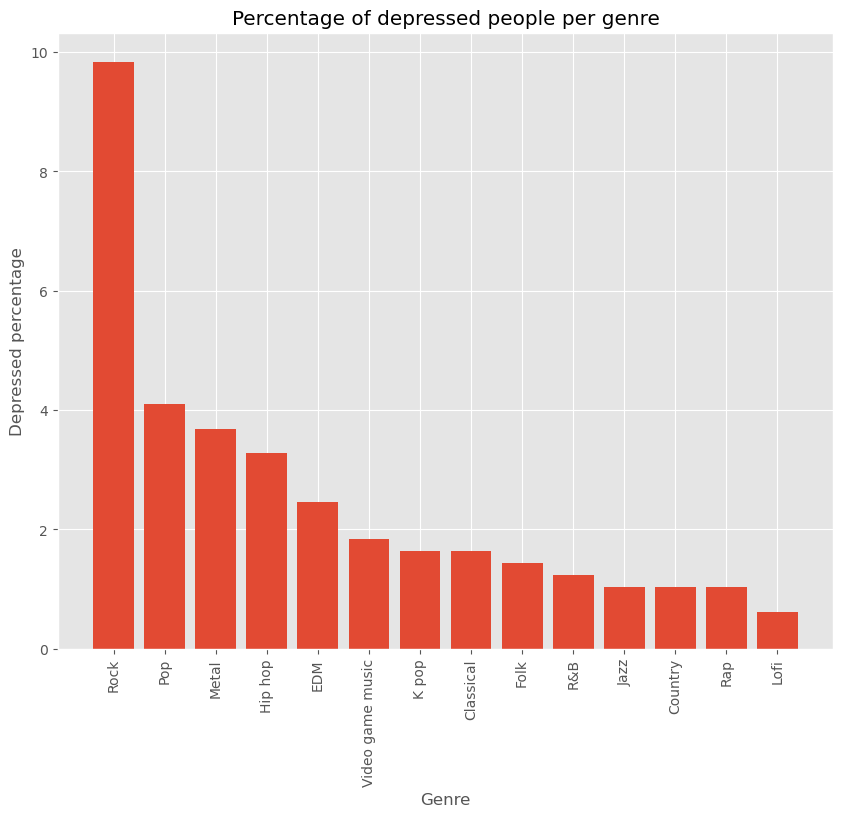

In [129]:
genre_count = df2[df2['Depression'] > 6]['Fav genre'].value_counts()
plt.figure(figsize=(10,8))
plt.bar(genre_count.index , genre_count.values * 100 / df2.shape[0])
plt.title('Percentage of depressed people per genre')
plt.xlabel('Genre')
plt.ylabel('Depressed percentage')
plt.xticks(rotation = 90)
plt.show()

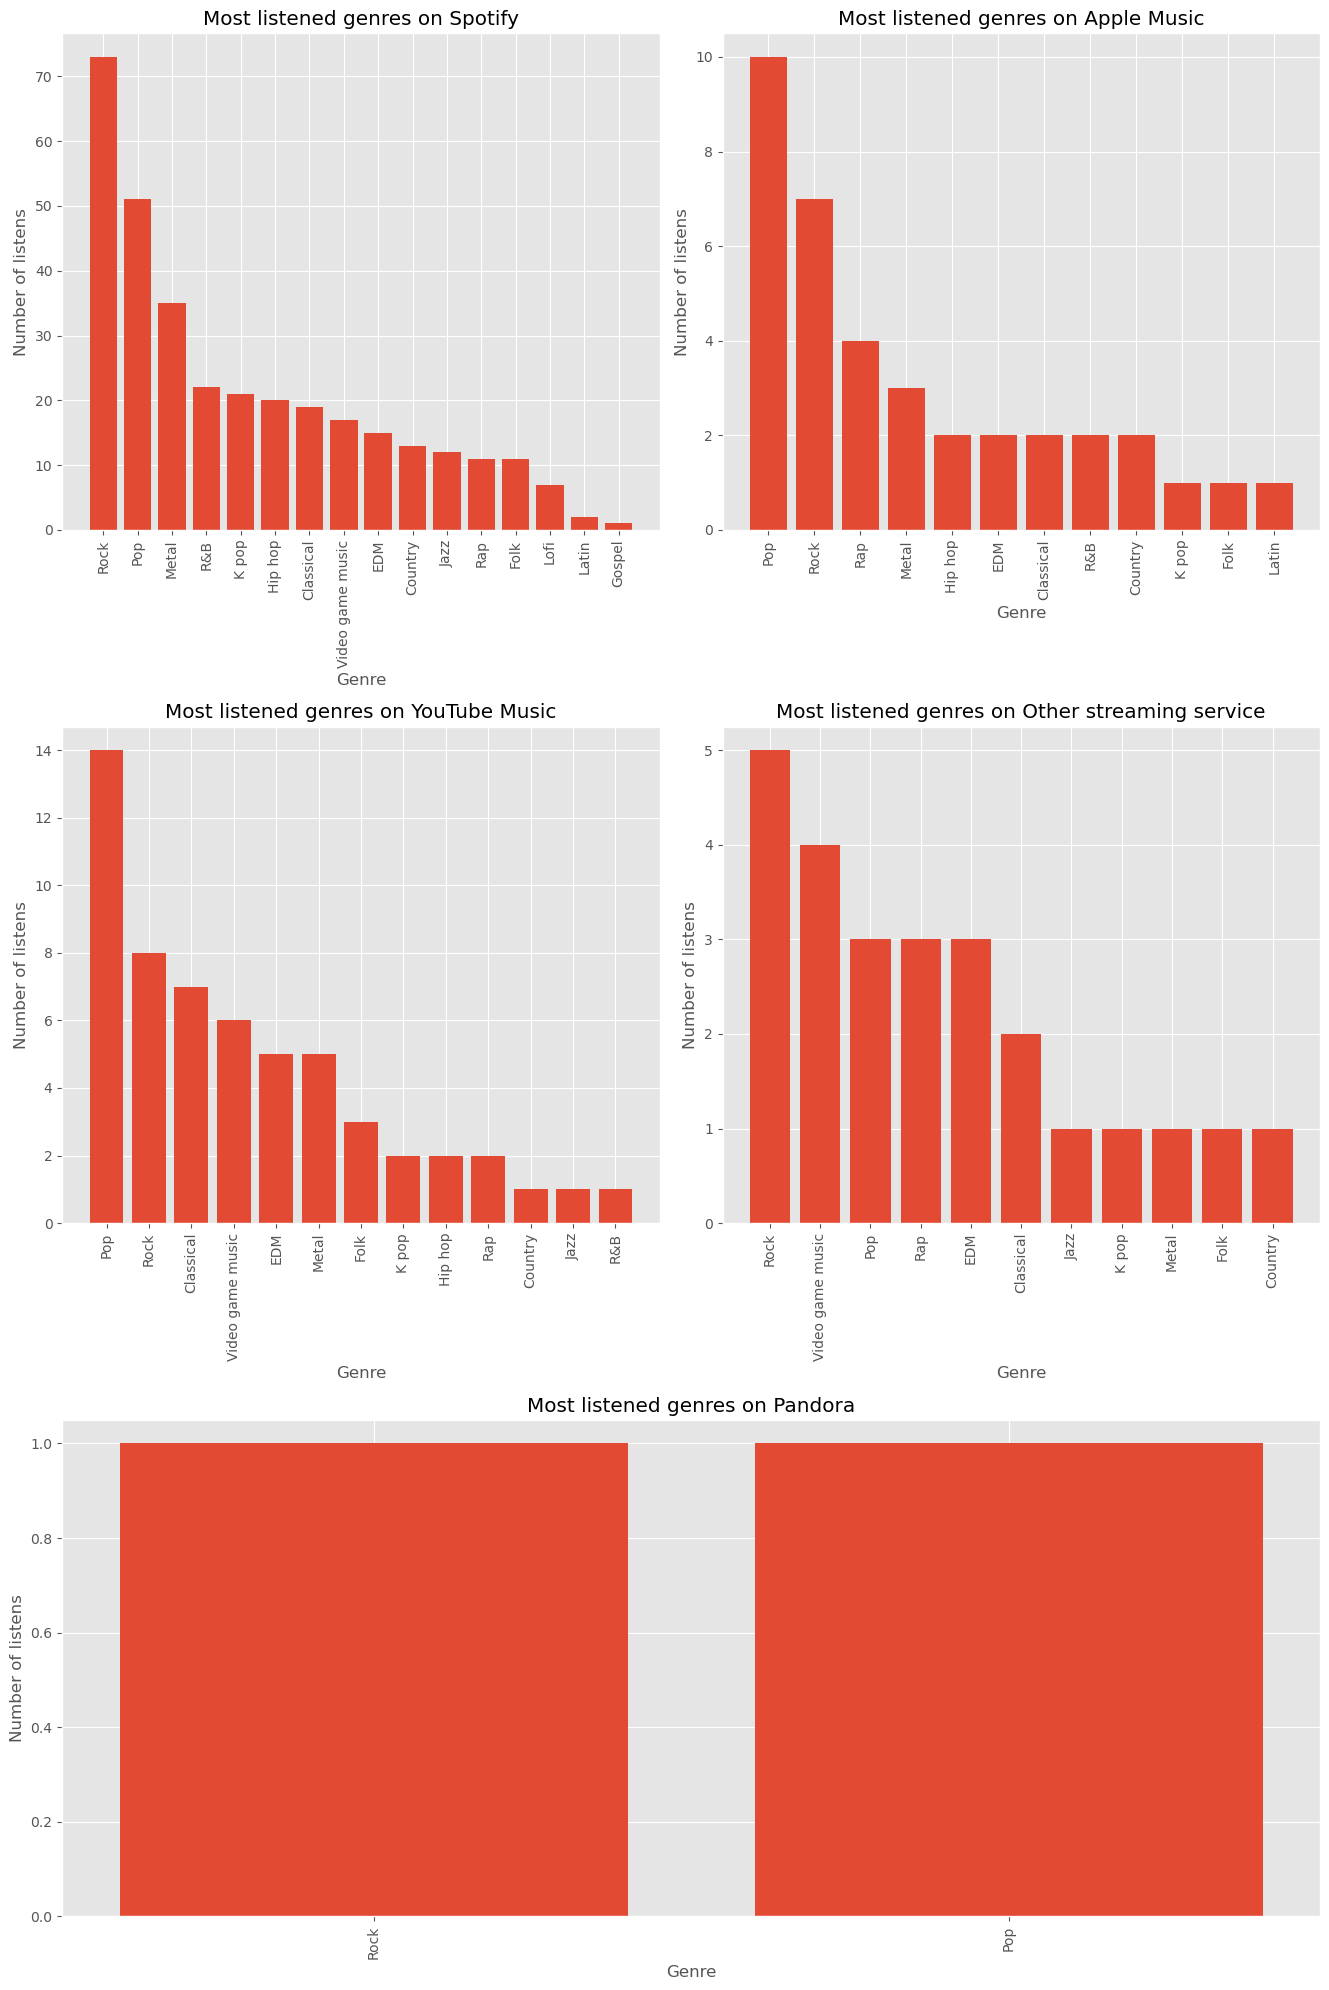

In [130]:
#What are the most listened genres per platform :
fig, ax = plt.subplots(figsize = (20,20))
ax0 = plt.subplot2grid(shape = (3,3), loc = (0,0))
ax1 = plt.subplot2grid(shape = (3,3), loc = (1,0))
ax2 = plt.subplot2grid(shape = (3,3), loc = (0,1))
ax3 = plt.subplot2grid(shape = (3,3), loc = (1,1))
ax4 = plt.subplot2grid(shape = (3,3), loc = (2,0), colspan=2)
platforms = df2['Primary streaming service'].value_counts().index
axes = [ax0, ax1, ax2, ax3, ax4]
for i, platform in enumerate(platforms) :
    genre_count = df2[df2['Primary streaming service'] == platform]['Fav genre'].value_counts()
    axes[i].bar(genre_count.index, genre_count.values)
    axes[i].set_title(f"Most listened genres on {platform}")  
    axes[i].set_xlabel('Genre')
    axes[i].set_ylabel('Number of listens')
    axes[i].tick_params(axis='x', rotation=90)
    

plt.tight_layout()  
plt.show()
    
    


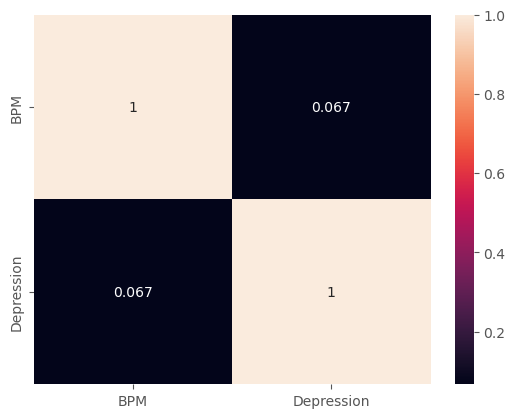

In [131]:
#Correlation between bpm and depression
bpm_dep = df2[["BPM", "Depression"]]
corr_mat = bpm_dep.corr()
sns.heatmap(corr_mat, annot = True)
plt.show()

There's too little correlation between BPM and depression, which means there's no significant relation between depression and corrolation

In [132]:
#Percentage of depressed people who are explaratory
percentage = round(df2[(df2['Exploratory'] == 'Yes') & (df2["Depression"] > 6)].shape[0] * 100 / df2.shape[0],2)
print("The percentage of depressed people who are explaratory is: ", percentage,'%')

The percentage of depressed people who are explaratory is:  28.69 %


This can signifcate that beign explaratory can reduce slightly the chance of being depressed

In [133]:
#Most depressed field
most_depressed_course = df1[df1["Depression"] == 'Yes']['Course'].value_counts().index[0]
print('The field with the most depressed students is:', most_depressed_course)


The field with the most depressed students is: Engineering


In [134]:
#Number of panic attack and depressed ppl and is there a correlation
depression_per = round(df1[df1['Depression'] == 'Yes'].shape[0] * 100 / df1.shape[0],2)
panic_att_per = round(df1[df1['Panic attack'] == 'Yes'].shape[0] * 100 / df1.shape[0],2)
print('The percentage of students with depression in our dataset is :',depression_per,'%\n')
print('The percentage of students with Panick attack in our dataset is :',panic_att_per,'%\n')

The percentage of students with depression in our dataset is : 34.65 %

The percentage of students with Panick attack in our dataset is : 32.67 %



We can notice that the numbers are close but there's a slight difference as we have more depressed students than students with panic attack in our dataset

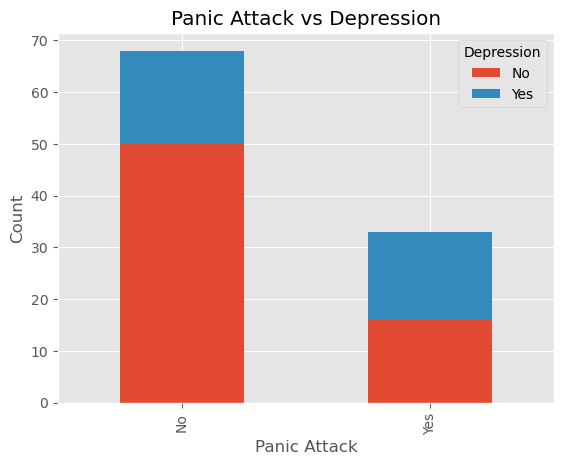

In [135]:
cross_tab = pd.crosstab(df1['Panic attack'], df1['Depression'])
cross_tab.plot(kind='bar', stacked=True)
plt.title('Panic Attack vs Depression')
plt.xlabel('Panic Attack')
plt.ylabel('Count')
plt.legend(title='Depression')
plt.show()


We can notice that there are some cases where students can be depressed without having panic attack and other cases where students can have panic attacks without being depressed

In [136]:
#The course with the most panic attacks cases
most_pan_att_course = df1[df1["Panic attack"] == 'Yes']['Course'].value_counts().index[0]
print('The field with the most panic attack cases is:', most_pan_att_course)

The field with the most panic attack cases is: Engineering


In [137]:
#Percentage of students who have seeked special treatment : 
percentage_special_treatment = round(df1[(df1['Specialist treatment'] == 'Yes')].shape[0] * 100 / df2.shape[0],2)
print('The percentage of students who have seeked a specialist treatment is:', percentage_special_treatment,"%")

The percentage of students who have seeked a specialist treatment is: 1.23 %


We can notice that very few students actually seeked a specialist treatment

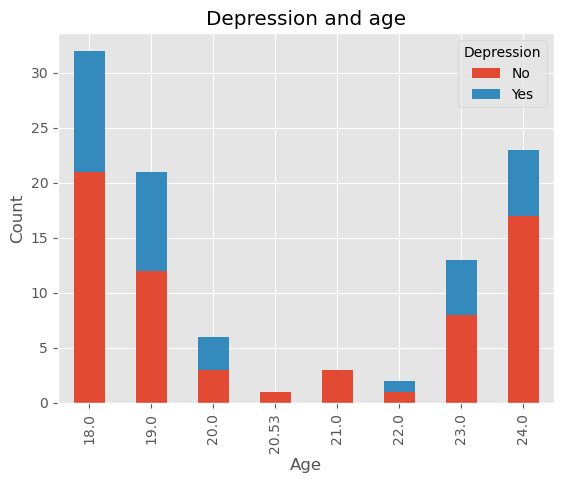

In [138]:
age_dep =  pd.crosstab(df1['Age'], df1['Depression'])
age_dep.plot(kind = 'bar', stacked= True)
plt.title('Depression and age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()